# Collapsed Distributions
# ${\rm{ln}}\ell=3000$,   $cutoff=10^{-12}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
#%matplotlib notebook

In [2]:
# Normal Distribution
def G(n,sigma2,na):
    return (2*np.pi*sigma2)**-.5*np.exp(-(n-na)**2/2/sigma2)

In [3]:
colors = ['#4173b3','#e95c47','#7dcba4','#5e4ea2','#fdbe6e','#808080','#2e8b57','#b8860b','#87ceeb','#1173b3','#e15c47','#2dcba4','#5e4ea2']
markers = ['s','D','<','>','^','v','h','H','o','*']
alpha=[10,5.0,2.0,1.5,0.5,0.1]
size=[16812,16812,16812,16812,33626,168126]

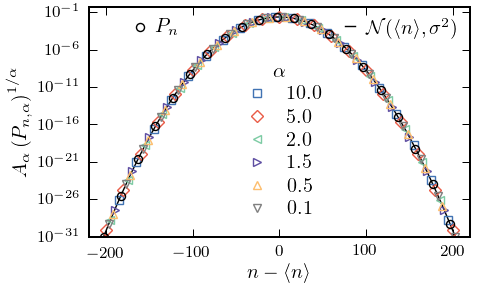

In [5]:
plt.style.reload_library()
with plt.style.context('aps.mplstyle'):

    figpn = plt.figure()
    axpn= figpn.add_subplot(111)
    axpn1 = axpn.twinx()
    axpn2 = axpn.twinx()
    axpn.set_xlabel(r'$n-\langle n \rangle$')
    axpn.set_ylabel(r'$A_{\alpha} \left(P_{n,\alpha}\right)^{1/\alpha}$')
    axpn.set_yscale('log', linthreshx = 1e-6)
    axpn1.set_yscale('log', linthreshx = 1e-6)
    axpn2.set_yscale('log', linthreshx = 1e-6)
    axpn.set_xlim(-220,+220)
    axpn.set_ylim(1e-31,5e-1)
    axpn1.set_xlim(-220,+220)
    axpn1.set_ylim(1e-31,5e-1)
    axpn2.set_xlim(-220,+220)
    axpn2.set_ylim(1e-31,5e-1)
    axpn1.tick_params(
       axis='both',          
       which='both',      
       right='off',      
       top='off',       
       labelright='off') 
    axpn2.tick_params(
       axis='both',        
       which='both',      
       right='on',      
       top='off',         
       labelright='off') 



    #Load the data files
    for i,alphai in enumerate(alpha):  
        data = np.loadtxt('logL3000alpha%.1fTh12Pnforl%i.dat'%(alpha[i],size[i]))
        n = data[:,0]
        Pn = data[:,1]
        Pntoa = data[:,2]
        Pn_a = data[:,3]
        avgn=np.sum(Pn*n)
        sigma2=np.sum(Pn*n**2)-avgn**2
        sumpn2=sum(Pn_a**(1/alphai))
        axpn.plot(n[int((5*i+1))::20]-avgn, Pn_a[int((5*i+1))::20]**(1/alphai)/sumpn2,marker=markers[i], color=colors[i],ms=4.0,mfc='None', mew=0.7,
                     linestyle='None', label=r'%.1f'%(alphai))
    axpn1.plot(n-avgn,G(n,sigma2,avgn) , color='#000000',marker='None',    mfc='None',linewidth = 0.7,linestyle='-',label=r'$\mathcal{N}(\langle n \rangle,\sigma^2)$')
    axpn2.plot(n[::20]-avgn, Pn[::20] , color='#000000',marker='o',    mfc='None',ms=4.0, mew=0.7,linestyle='None', label=r'$P_n$')


    axpn.legend(loc='lower center',frameon=False, numpoints=1,title=r'$\alpha$')
    axpn1.legend(loc=(0.65,0.83),frameon=False,handlelength=.5, numpoints=1,ncol=1)
    axpn2.legend(loc=(0.100,0.83),frameon=False,handlelength=.5, numpoints=1,ncol=1)


    axpn.set_zorder(axpn1.get_zorder()+1) # put axpn in front of axpn1 
    axpn2.set_zorder(axpn.get_zorder()+1) # put axpn2 in front of axpn 
    axpn.patch.set_visible(False) # hide the 'canvas' 

    plt.savefig('CollapsedDistributions.pdf')
    plt.savefig('CollapsedDistributions.png')
    plt.show()